In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None)
import os
from modules.TravelSurveyAnalysis import TravelSurveyAnalysis

if 'TravelSurvey' in os.getcwd():
    data_folder = '../../data/'
elif 'data_analysis' in os.getcwd():
    data_folder = '../data/'
else:
    data_folder = './data/'

source_folder_path = data_folder + 'netherlands/'
destination_folder_path = data_folder + 'netherlands/'

In [2]:
expansion_factor_trip = 'FactorV'
expansion_factor_person = 'FactorP'

tsa = TravelSurveyAnalysis(source_folder_path, destination_folder_path,
                           expansion_factor_trip, expansion_factor_person)

In [3]:
filename = 'ODiN2018_Databestand_v2.0.csv'
data = tsa.read_data(source_folder_path + filename, sep=";")

In [4]:
data

,OP,OPID,Steekproef,Mode,HHPers,HHSam,HHPlOP,HHLft1,HHLft2,HHLft3,HHLft4,WoPC,WoGem,Sted,GemGr,Prov,Corop,BuurtAdam,MRA,Geslacht,Leeftijd,KLeeft,Herkomst,BetWerk,OnbBez,MaatsPart,Opleiding,HHBestInkG,HHGestInkG,HHLaagInk,HHSocInk,HHWelvG,HHRijbewijsAu,HHRijbewijsMo,HHRijbewijsBr,OPRijbewijsAu,OPRijbewijsMo,OPRijbewijsBr,HHAuto,HHAutoL,OPAuto,BrandstofPa1,XBrandstofPa1,BrandstofEPa1,BouwjaarPa1,KBouwjaarPa1,KGewichtPa1,TenaamPa1,BrandstofPa2,XBrandstofPa2,BrandstofEPa2,BouwjaarPa2,KBouwjaarPa2,KGewichtPa2,TenaamPa2,BrandstofPaL,XBrandstofPaL,BrandstofEPaL,BouwjaarPaL,KBouwjaarPaL,KGewichtPaL,HHMotor,OPMotor,HHBrom,OPBrom,HHSnor,OPSnor,HHEFiets,HHBezitVm,OPBezitVm,FqNEFiets,FqEFiets,FqBTM,FqTrein,FqAutoB,FqAutoP,FqBrSnor,OVStKaart,Jaar,Maand,Week,Dag,Weekdag,Feestdag,Weggeweest,RedenNW,RedenNWZ,RedenNWW,RedenNWB,AantVpl,AantOVVpl,AantSVpl,EFiets,AutoEig,AutoHhL,AutoLWg,AutoLPl,AutoBed,AutoDOrg,AutoDPart,AutoDBek,AutoLeen,AutoHuur,AutoAnd,ByzDag,ByzAdr,ByzVvm,ByzTyd,ByzDuur,ByzRoute,ByzReden,ReisduurOP,AfstandOP,AfstandSOP,Verpl,VerplID,VerplNr,Toer,AantRit,Doel,MotiefV,KMotiefV,MeerWink,AardWerk,VertLoc,VertGeb,VertPC,VertPCBL,VertGem,VertProv,VertCorop,VertMRA,AankGeb,AankPC,AankPCBL,AankGem,AankProv,AankCorop,AankMRA,PCG,GemG,PCBLG,AfstV,KAfstV,Hvm,HvmRol,KHvm,VertUur,VertMin,KVertTijd,AankUur,AankMin,Reisduur,KReisduur,ActDuur,Kind6,VolgWerk,SAantAdr,SDezPlts,SPlaats1,SPlaats2,SPlaats3,SPlaats4,SPlaats5,AfstS,AfstSBL,SVvm1,SVvm2,SVvm3,SVvm4,SBegUur,SBegMin,SEindUur,SEindMin,CorrVerpl,GehBLVer,Rit,RitID,RitNr,AfstR,AfstRBL,KAfstR,Rvm,RvmRol,RAantIn,KRvm,RVertUur,RVertMin,RAankUur,RAankMin,RReisduur,RReisduurBL,RVertStat,RAankStat,RTSamen,RCorrSnelh,RVliegVer,FactorH,FactorP,FactorV
0,1,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009301,1,0,1,8,7,4,1,12,1,0,9901.0,1.0,3,1,2,18,0,9933.0,1.0,10,1,2,18,0.0,0,0.0,60,6,1,1,1,10,30,5,10,45,15,4,30,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930101,1,60,0,6,1,1,1,1,10,30,10,45,15,0,0.0,0.0,13,0,0,347,347,126759
1,0,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009302,2,0,1,1,7,4,3,12,4,0,9933.0,1.0,10,1,2,18,0,9901.0,1.0,3,1,2,18,0.0,0,0.0,60,6,1,1,1,11,15,5,11,25,10,3,270,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930201,1,60,0,6,1,1,1,1,11,15,11,25,10,0,0.0,0.0,13,0,0,347,347,126759
2,0,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009303,3,0,1,9,8,6,3,12,1,0,9901.0,1.0,3,1,2,18,0,9902.0,1.0,3,1,2,18,0.0,0,0.0,10,3,8,4,5,15,55,8,16,0,5,2,150,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930301,1,10,0,3,8,4,11,5,15,55,16,0,5,0,0.0,0.0,13,0,0,347,347,126759
3,0,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009304,4,0,1,1,8,6,3,12,4,0,9902.0,1.0,3,1,2,18,0,9901.0,1.0,3,1,2,18,0.0,0,0.0,10,3,8,4,5,18,30,11,18,35,5,2,#NULL!,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930401,1,10,0,3,8,4,11,5,18,30,18,35,5,

In [5]:
data[expansion_factor_trip].sum()

19086359370

It's not possible to sum up all the expansion factor to obtain the total esstimate of the trips in the netherlands. It's simply a weight. Maybe we would have to normalize the weights based on an external estimation of the total trips to be able to say that.

### Important columns

KHvm - Principal modo de movimento da classe de transporte

- missing if no movement
- 1: Passenger car - driver
- 2: Passenger car - passenger
- 3: Train
- 4: Bus/tram/metro
- 5: Bicycle
- 6: On foot
- 7: Other


Geslacht - Gender

- 1: Man
- 2: Woman

Leeftijd - Idade

HHBestInkG - Renda disponível das famílias (grupos de 10%)

HHGestInkG - Renda disponível familiar padronizada (grupos de 10%)

RReisduur - Duração da viagem na Holanda (em minutos)

RReisduurBL - Tempo de viagem ao exterior (em minutos)

In [36]:
mode_column = 'KHvm'
mode_index_map = {'1': 'Passenger car - driver', '2': 'Passenger car - passenger', '3': 'Train', '4': 'Bus/tram/metro', '5': 'Bicycle', '6': 'On foot', '7': 'Other'}
df = tsa.calculate_distribution(data, mode_column, expansion_factor_trip, mode_index_map)
df

,FactorV
KHvm_new,
Bicycle,26.122166
Bus/tram/metro,5.247778
On foot,14.697099
Other,3.922284
Passenger car - driver,31.762581
Passenger car - passenger,10.894304
Train,7.353789


In [38]:
mode_column = 'KHvm'
mode_index_map = {'1': 'Personal motorized vehicles', '2': 'Personal motorized vehicles', '3': 'Public transportation', '4': 'Public transportation', '5': 'Bicycle', '6': 'On foot', '7': 'Other'}
df = tsa.calculate_distribution(data, mode_column, expansion_factor_trip, reduced_mode_index_map)
df

,FactorV
KHvm_new,
Bicycle,26.122166
On foot,14.697099
Other,3.922284
Personal motorized vehicles,42.656885
Public transportation,12.601567


In [8]:
detailed_mode_column = 'Hvm'
df = tsa.calculate_distribution(data, detailed_mode_column, expansion_factor = False)
df

,Hvm
1,40.617093
8,22.708694
9,13.252543
2,7.765394
#NULL!,4.158514
7,3.412758
3,2.827831
11,1.395220
5,1.178049
4,0.855366


In [9]:
# with trip expansion factor
gender_column = 'Geslacht'
gender_index_map = {1: 'Man', 2: 'Woman'}
df = tsa.calculate_distribution(data, gender_column, expansion_factor_trip, gender_index_map)
df

,FactorV
Geslacht_new,
Man,47.895491
Woman,52.104509


In [10]:
# with person expansion factor
df = tsa.calculate_distribution(data, gender_column, expansion_factor_person, gender_index_map)
df

,FactorP
Geslacht_new,
Man,47.895662
Woman,52.104338


In [11]:
bike_trips = tsa.get_specific_mode_trips(data, mode_column, ['5'])
bike_trips

,OP,OPID,Steekproef,Mode,HHPers,HHSam,HHPlOP,HHLft1,HHLft2,HHLft3,HHLft4,WoPC,WoGem,Sted,GemGr,Prov,Corop,BuurtAdam,MRA,Geslacht,Leeftijd,KLeeft,Herkomst,BetWerk,OnbBez,MaatsPart,Opleiding,HHBestInkG,HHGestInkG,HHLaagInk,HHSocInk,HHWelvG,HHRijbewijsAu,HHRijbewijsMo,HHRijbewijsBr,OPRijbewijsAu,OPRijbewijsMo,OPRijbewijsBr,HHAuto,HHAutoL,OPAuto,BrandstofPa1,XBrandstofPa1,BrandstofEPa1,BouwjaarPa1,KBouwjaarPa1,KGewichtPa1,TenaamPa1,BrandstofPa2,XBrandstofPa2,BrandstofEPa2,BouwjaarPa2,KBouwjaarPa2,KGewichtPa2,TenaamPa2,BrandstofPaL,XBrandstofPaL,BrandstofEPaL,BouwjaarPaL,KBouwjaarPaL,KGewichtPaL,HHMotor,OPMotor,HHBrom,OPBrom,HHSnor,OPSnor,HHEFiets,HHBezitVm,OPBezitVm,FqNEFiets,FqEFiets,FqBTM,FqTrein,FqAutoB,FqAutoP,FqBrSnor,OVStKaart,Jaar,Maand,Week,Dag,Weekdag,Feestdag,Weggeweest,RedenNW,RedenNWZ,RedenNWW,RedenNWB,AantVpl,AantOVVpl,AantSVpl,EFiets,AutoEig,AutoHhL,AutoLWg,AutoLPl,AutoBed,AutoDOrg,AutoDPart,AutoDBek,AutoLeen,AutoHuur,AutoAnd,ByzDag,ByzAdr,ByzVvm,ByzTyd,ByzDuur,ByzRoute,ByzReden,ReisduurOP,AfstandOP,AfstandSOP,Verpl,VerplID,VerplNr,Toer,AantRit,Doel,MotiefV,KMotiefV,MeerWink,AardWerk,VertLoc,VertGeb,VertPC,VertPCBL,VertGem,VertProv,VertCorop,VertMRA,AankGeb,AankPC,AankPCBL,AankGem,AankProv,AankCorop,AankMRA,PCG,GemG,PCBLG,AfstV,KAfstV,Hvm,HvmRol,KHvm,VertUur,VertMin,KVertTijd,AankUur,AankMin,Reisduur,KReisduur,ActDuur,Kind6,VolgWerk,SAantAdr,SDezPlts,SPlaats1,SPlaats2,SPlaats3,SPlaats4,SPlaats5,AfstS,AfstSBL,SVvm1,SVvm2,SVvm3,SVvm4,SBegUur,SBegMin,SEindUur,SEindMin,CorrVerpl,GehBLVer,Rit,RitID,RitNr,AfstR,AfstRBL,KAfstR,Rvm,RvmRol,RAantIn,KRvm,RVertUur,RVertMin,RAankUur,RAankMin,RReisduur,RReisduurBL,RVertStat,RAankStat,RTSamen,RCorrSnelh,RVliegVer,FactorH,FactorP,FactorV,KHvm_new,Geslacht_new
2,0,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009303,3,0,1,9,8,6,3,12,1,0,9901.0,1.0,3,1,2,18,0,9902.0,1.0,3,1,2,18,0.0,0,0.0,10,3,8,4,5,15,55,8,16,0,5,2,150,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930301,1,10,0,3,8,4,11,5,15,55,16,0,5,0,0.0,0.0,13,0,0,347,347,126759,Bicycle,Man
3,0,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009304,4,0,1,1,8,6,3,12,4,0,9902.0,1.0,3,1,2,18,0,9901.0,1.0,3,1,2,18,0.0,0,0.0,10,3,8,4,5,18,30,11,18,35,5,2,#NULL!,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930401,1,10,0,3,8,4,11,5,18,30,18,35,5,0,0.0,0.0,13,0,0,347,347,126759,Bicycle,Man
7,1,55834100372,1,1,2,2,3,0,0,0,2,9785,5,4,3,1,3,0,18,1,60,14,1,3,0,2,4,10,10,8,9,10,2,0,2,1,0,1,1,0,0,1,0,0,1999,1,2,2,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,0,1,5,4,3,3,3,5,4,2018,1,4,26,6,0,1,0,0,0,0,4,0,0,5,4,4,4,4,4,4,4,4,4,4,4,2,3,3,3,3,3,11,81,184,0,1,5583410037201,1,0,1,2,1,1,3,12,1,0,9785.0,1.0,5,1,3,18,0,9743.0,1.0,14,1,3,18,0.0,0,0.0,80,7,8,4,5,7,45,3,8,10,25,6,230,0,2,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341003720101,1,80,0,7,8,4,11,5,7,45,8,10,25,0,0.0,0.0,13,0,0,115,229,83598,Bicycle,Man
10,0,55834100372,1,1,2,2,3,0,0,0,2,9785,5,4,3,1,3,0,18,1,60,14,1,3,0,2,4,10,10,8,9,10,2,0,2,1,0,1,1,0,0,1,0,0,1999,1,2,2,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,0,1,5,4,3,3,3,5,4,2018,1,4,26,6,0,1,0,0,0,0,4,0,0,5,4,4,4,4,4,4,4,4,4,4,4,2,3,3,3,3,3,11,81,184,0,1,5583410037204,4,0,1,1,3,2,3,12,3,0,9743.0,1.0,14,1,3,18,0,9785.0,1.0,5,1,3,18,0.0,0,0.0,100,8,8,4,5,18,0,11,18,45,45,8,#NULL!,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#N

In [12]:
tsa.calculate_distribution(bike_trips, gender_column, expansion_factor_person, gender_index_map)

,FactorP
Geslacht_new,
Man,44.958221
Woman,55.041779


In [13]:
tsa.calculate_distribution(bike_trips, gender_column, expansion_factor_trip, gender_index_map)

,FactorV
Geslacht_new,
Man,44.957707
Woman,55.042293


## Age

In [14]:
age_column = 'Leeftijd'

/home/oem/Documents/ic/bikesp-analysis/data_analysis/TravelSurvey/modules/TravelSurveyAnalysis.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


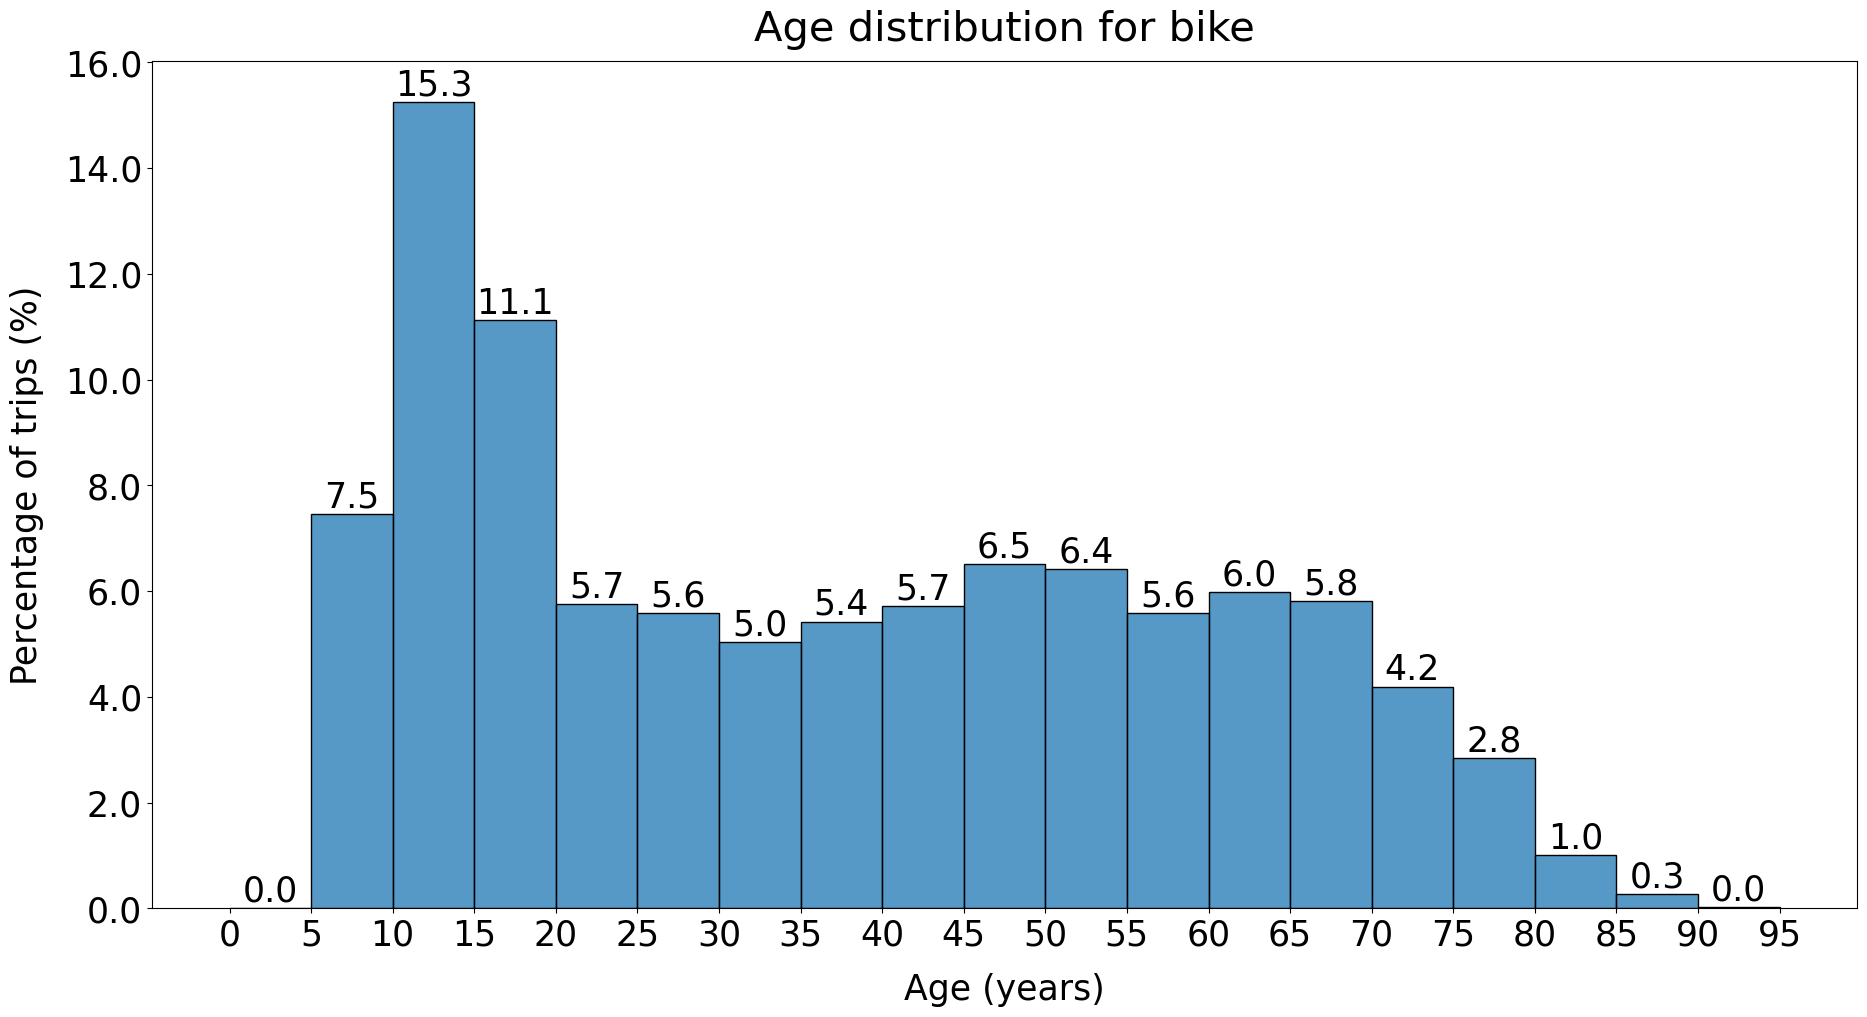

In [15]:
list_bins = list(range(0,100,5))
tsa.plot_histogram_age(bike_trips, age_column, expansion_factor = False, 
                       list_bins = list_bins, mode = 'bike')

/home/oem/Documents/ic/bikesp-analysis/data_analysis/TravelSurvey/modules/TravelSurveyAnalysis.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


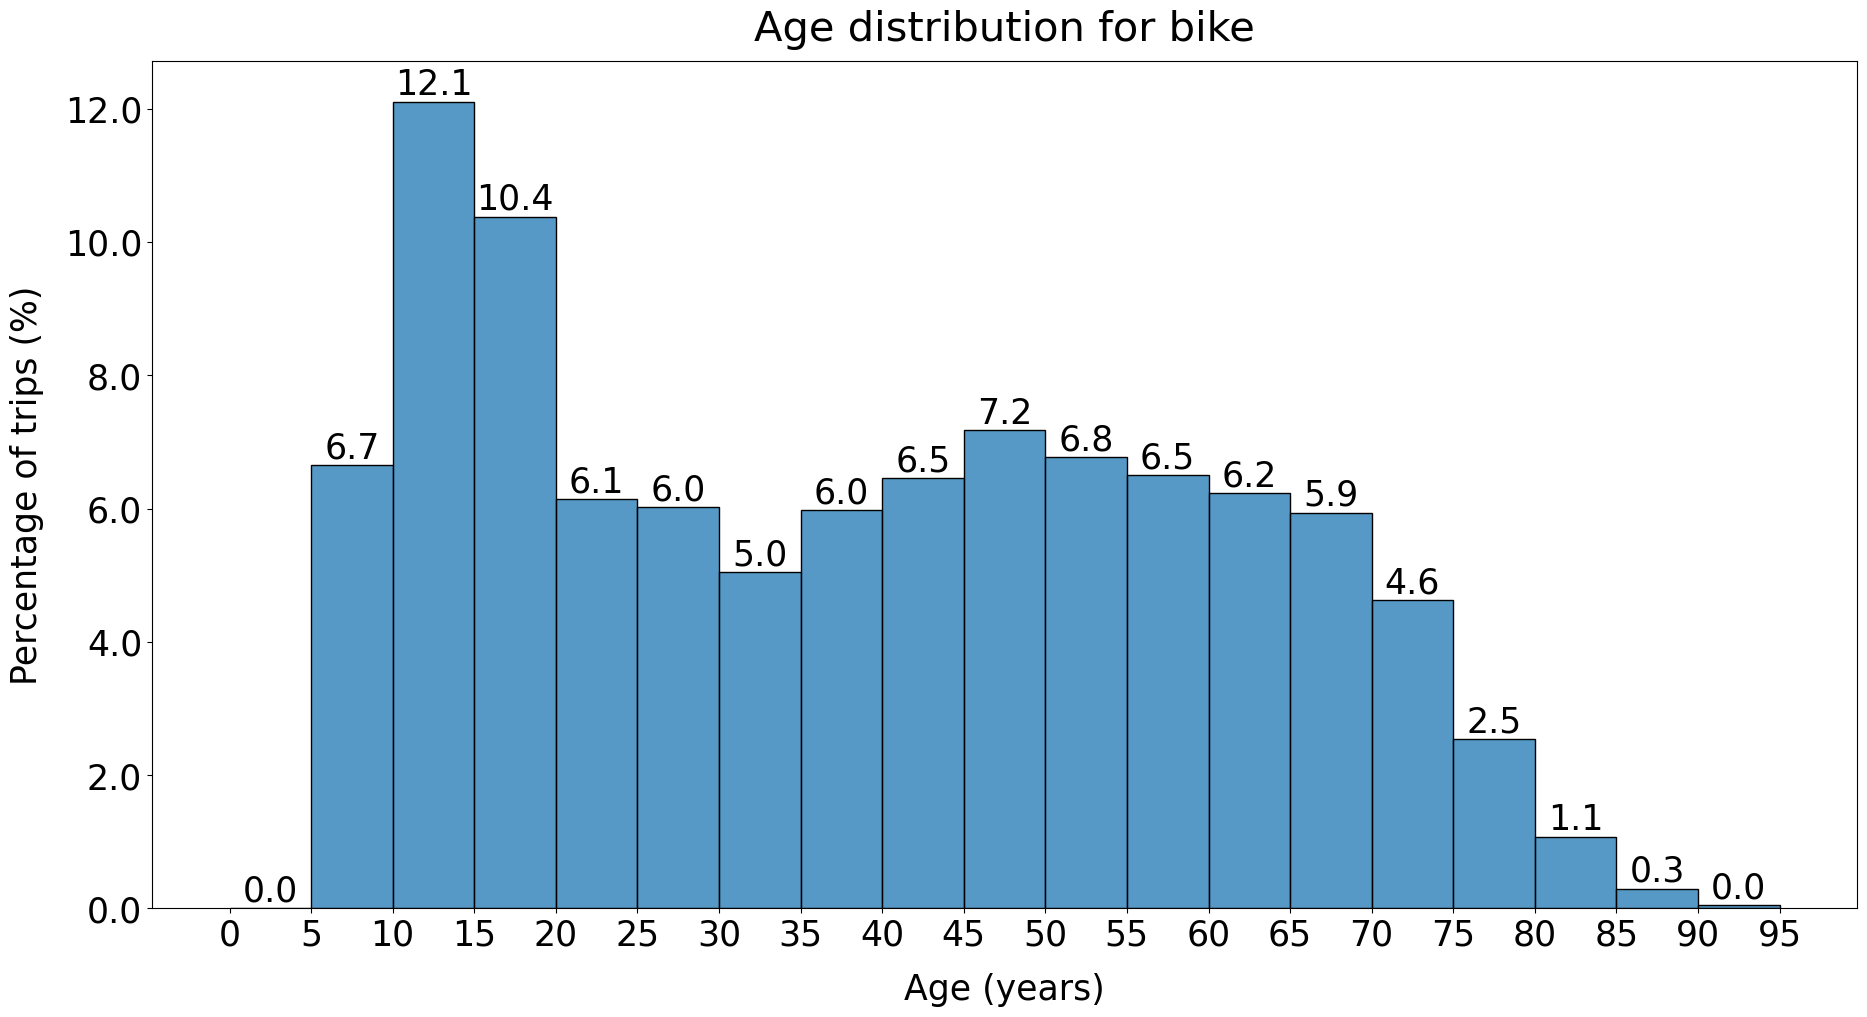

In [16]:
list_bins = list(range(0,100,5))
tsa.plot_histogram_age(bike_trips, age_column, expansion_factor = expansion_factor_trip, 
                       list_bins = list_bins, mode = 'bike')

/home/oem/Documents/ic/bikesp-analysis/data_analysis/TravelSurvey/modules/TravelSurveyAnalysis.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


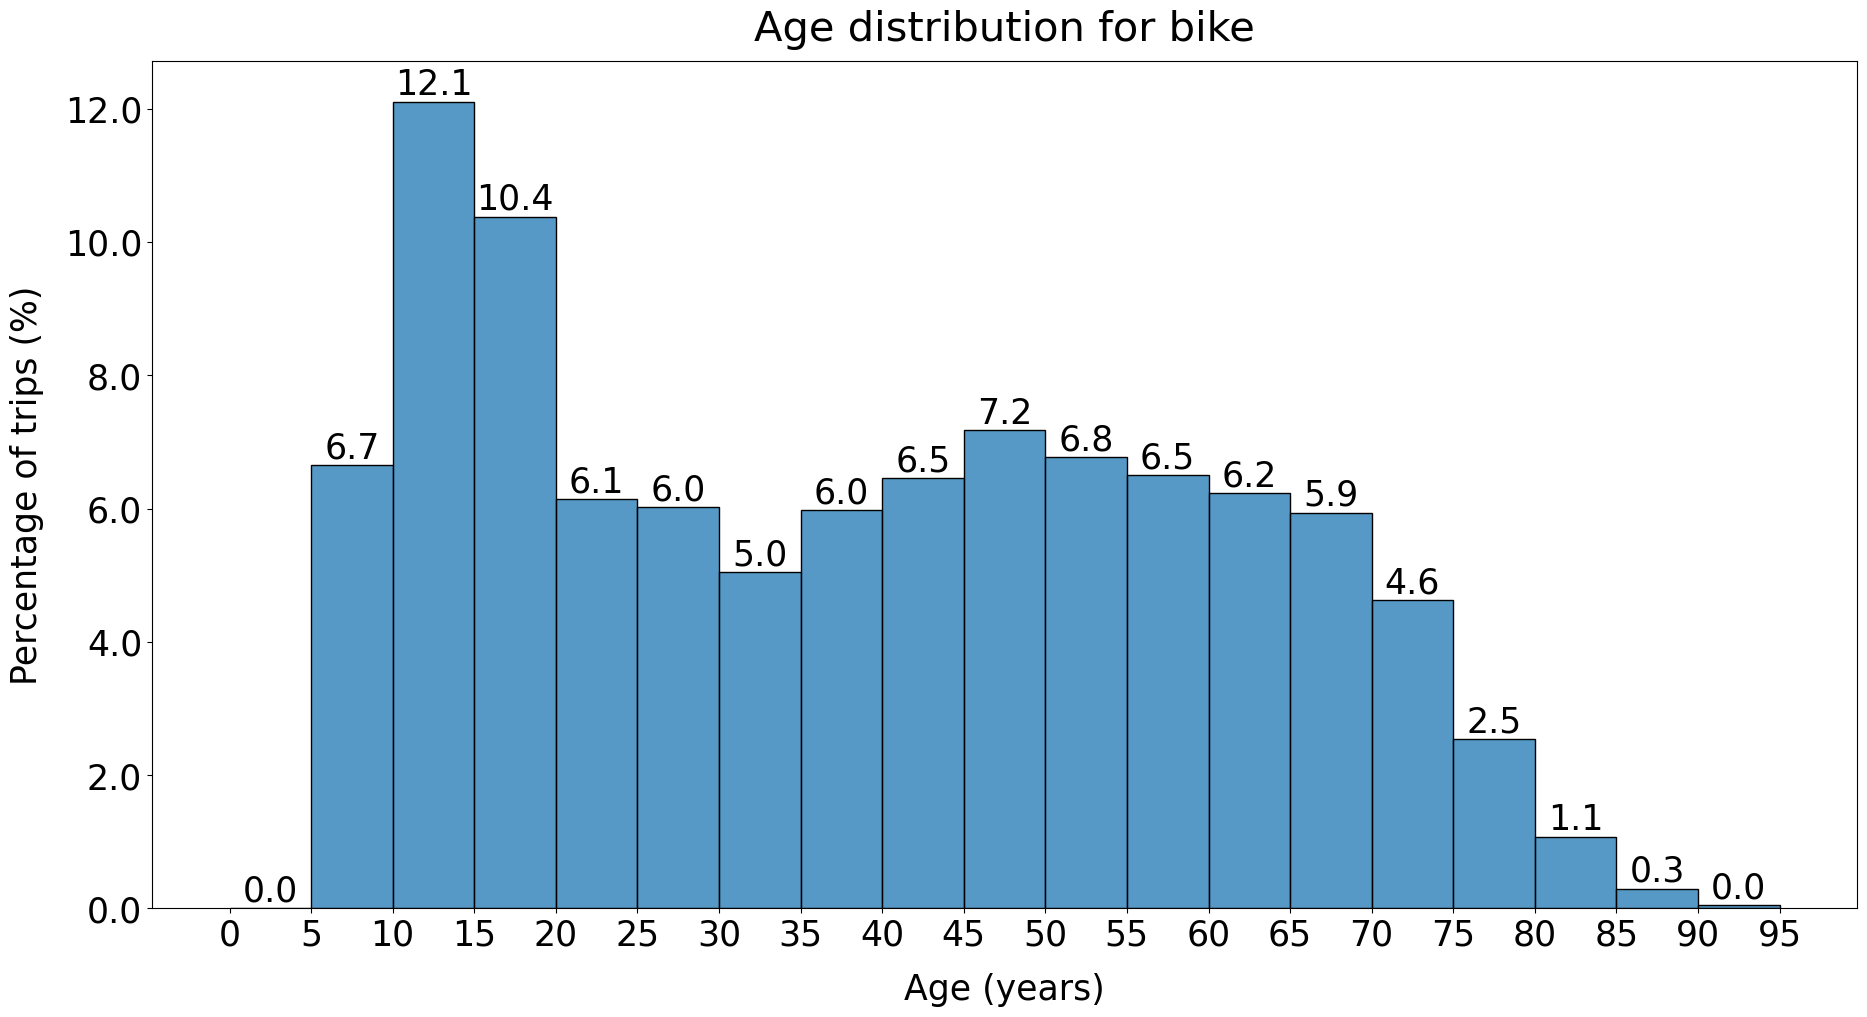

In [17]:
list_bins = list(range(0,100,5))
tsa.plot_histogram_age(bike_trips, age_column, expansion_factor = expansion_factor_person, 
                       list_bins = list_bins, mode = 'bike')

/home/oem/Documents/ic/bikesp-analysis/data_analysis/TravelSurvey/modules/TravelSurveyAnalysis.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


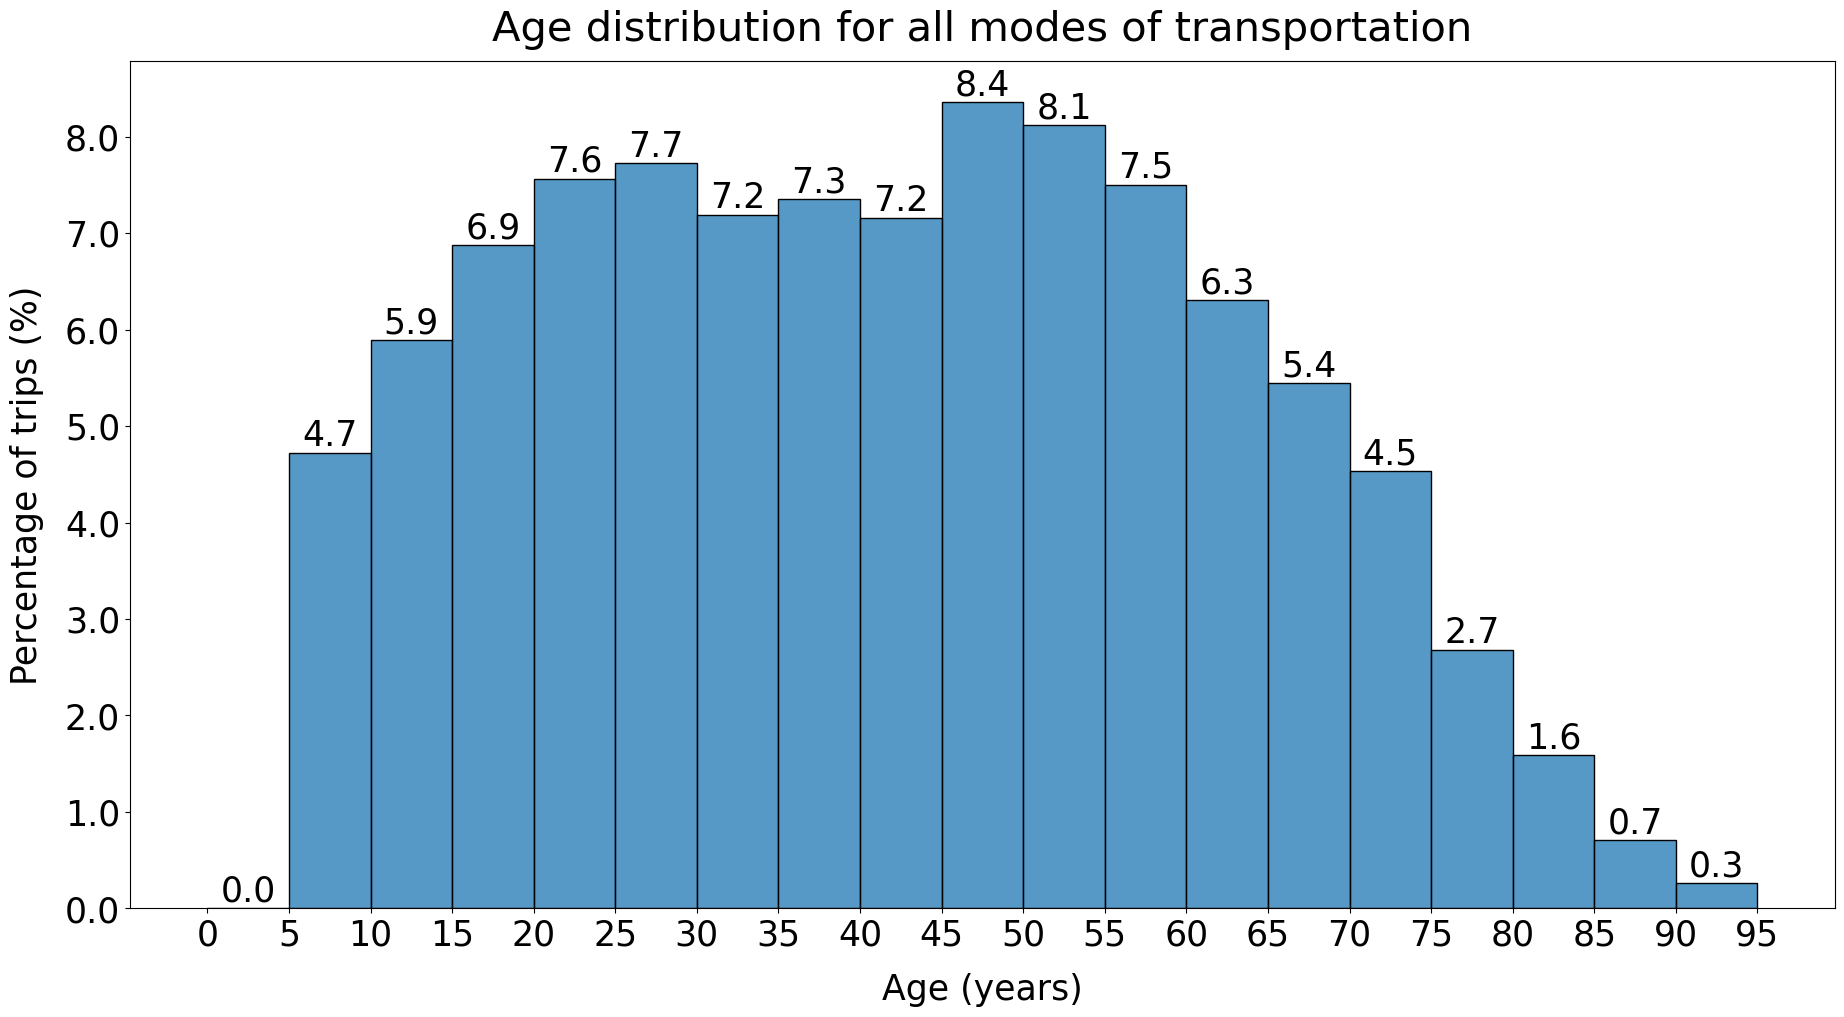

In [18]:
list_bins = list(range(0,100,5))
tsa.plot_histogram_age(data, age_column, expansion_factor = expansion_factor_person, 
                       list_bins = list_bins, mode = 'all modes of transportation')

/home/oem/Documents/ic/bikesp-analysis/data_analysis/TravelSurvey/modules/TravelSurveyAnalysis.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


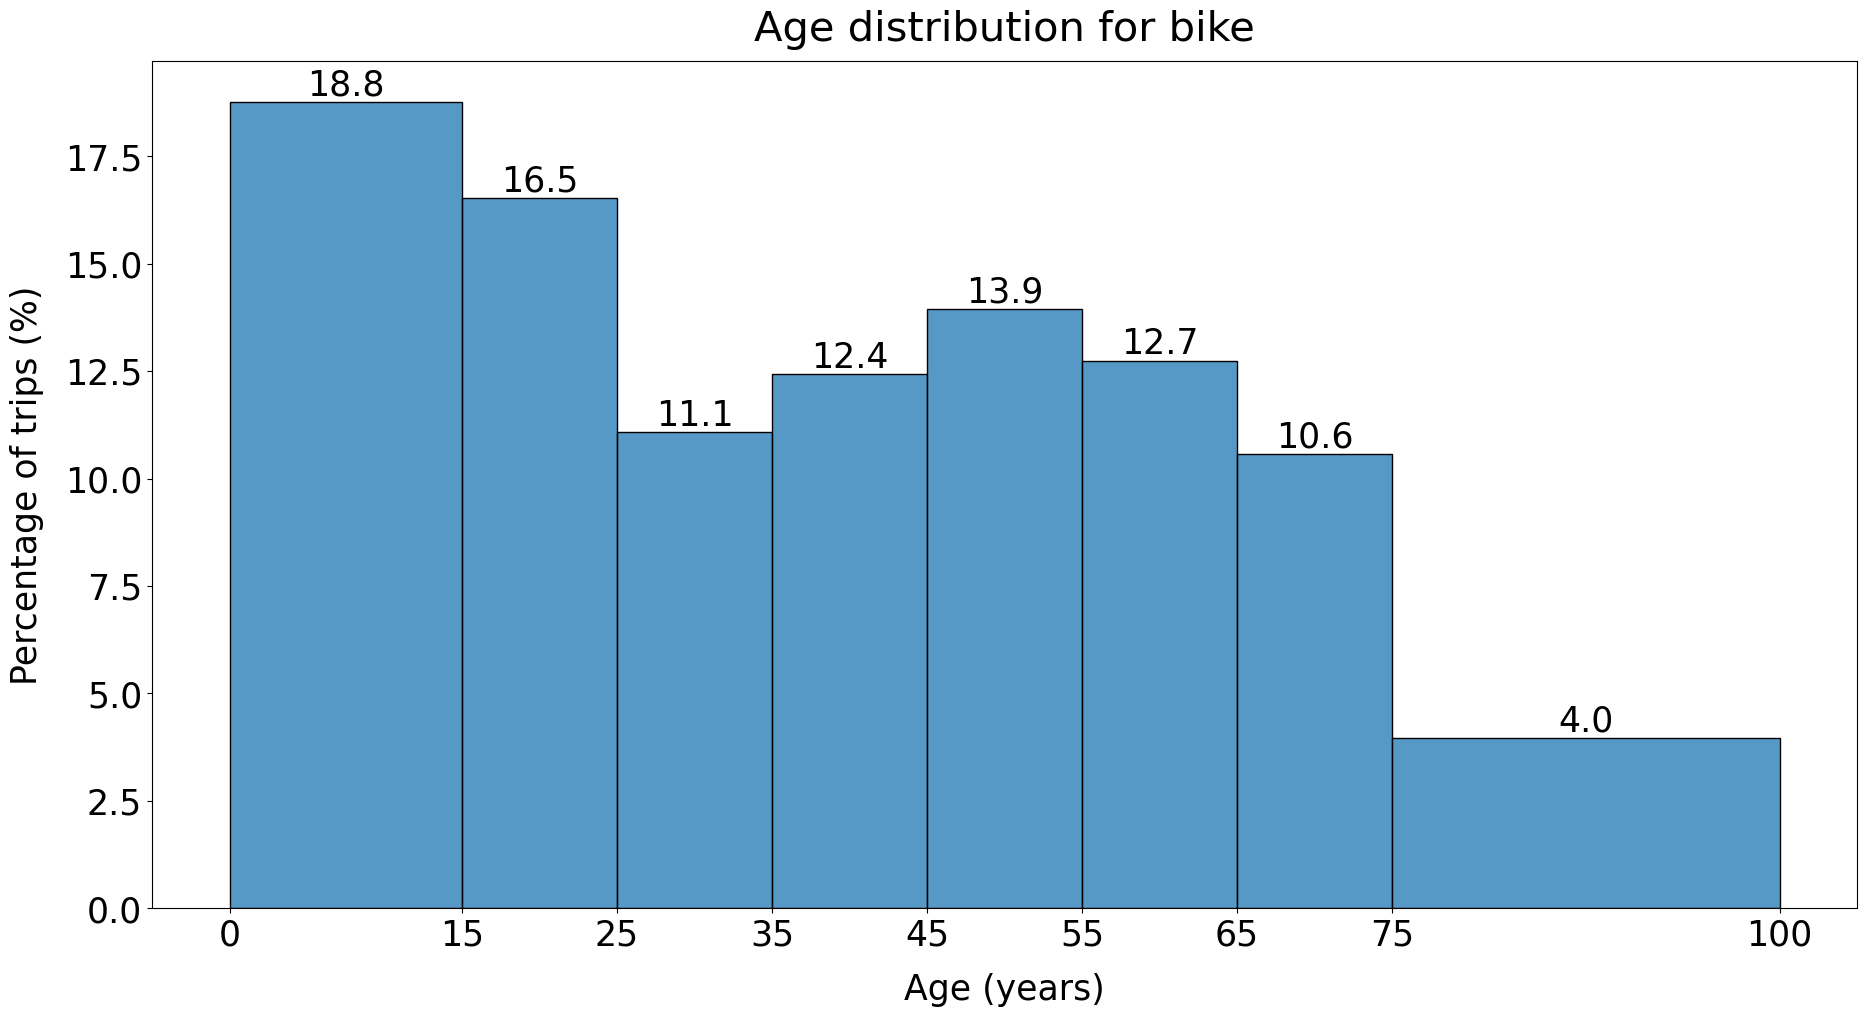

In [19]:
list_bins = [0,15,25,35,45,55,65,75,100]
tsa.plot_histogram_age(bike_trips, variable_column = age_column,
                       expansion_factor = expansion_factor_person,
                       list_bins = list_bins, mode = 'bike', save=True)

In [20]:
public_trips = data[(data[mode_column] == '3') | (data[mode_column] == '4')]
individual_trips = data[(data[mode_column] == '1') | (data[mode_column] == '2')]
walk_trips = data[data[mode_column] == '6']

In [21]:
public_trips = tsa.get_specific_mode_trips(data, mode_column, ['3', '4'])
individual_trips = tsa.get_specific_mode_trips(data, mode_column, ['1', '2'])
walk_trips = tsa.get_specific_mode_trips(data, mode_column, ['6'])

/home/oem/Documents/ic/bikesp-analysis/data_analysis/TravelSurvey/modules/TravelSurveyAnalysis.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


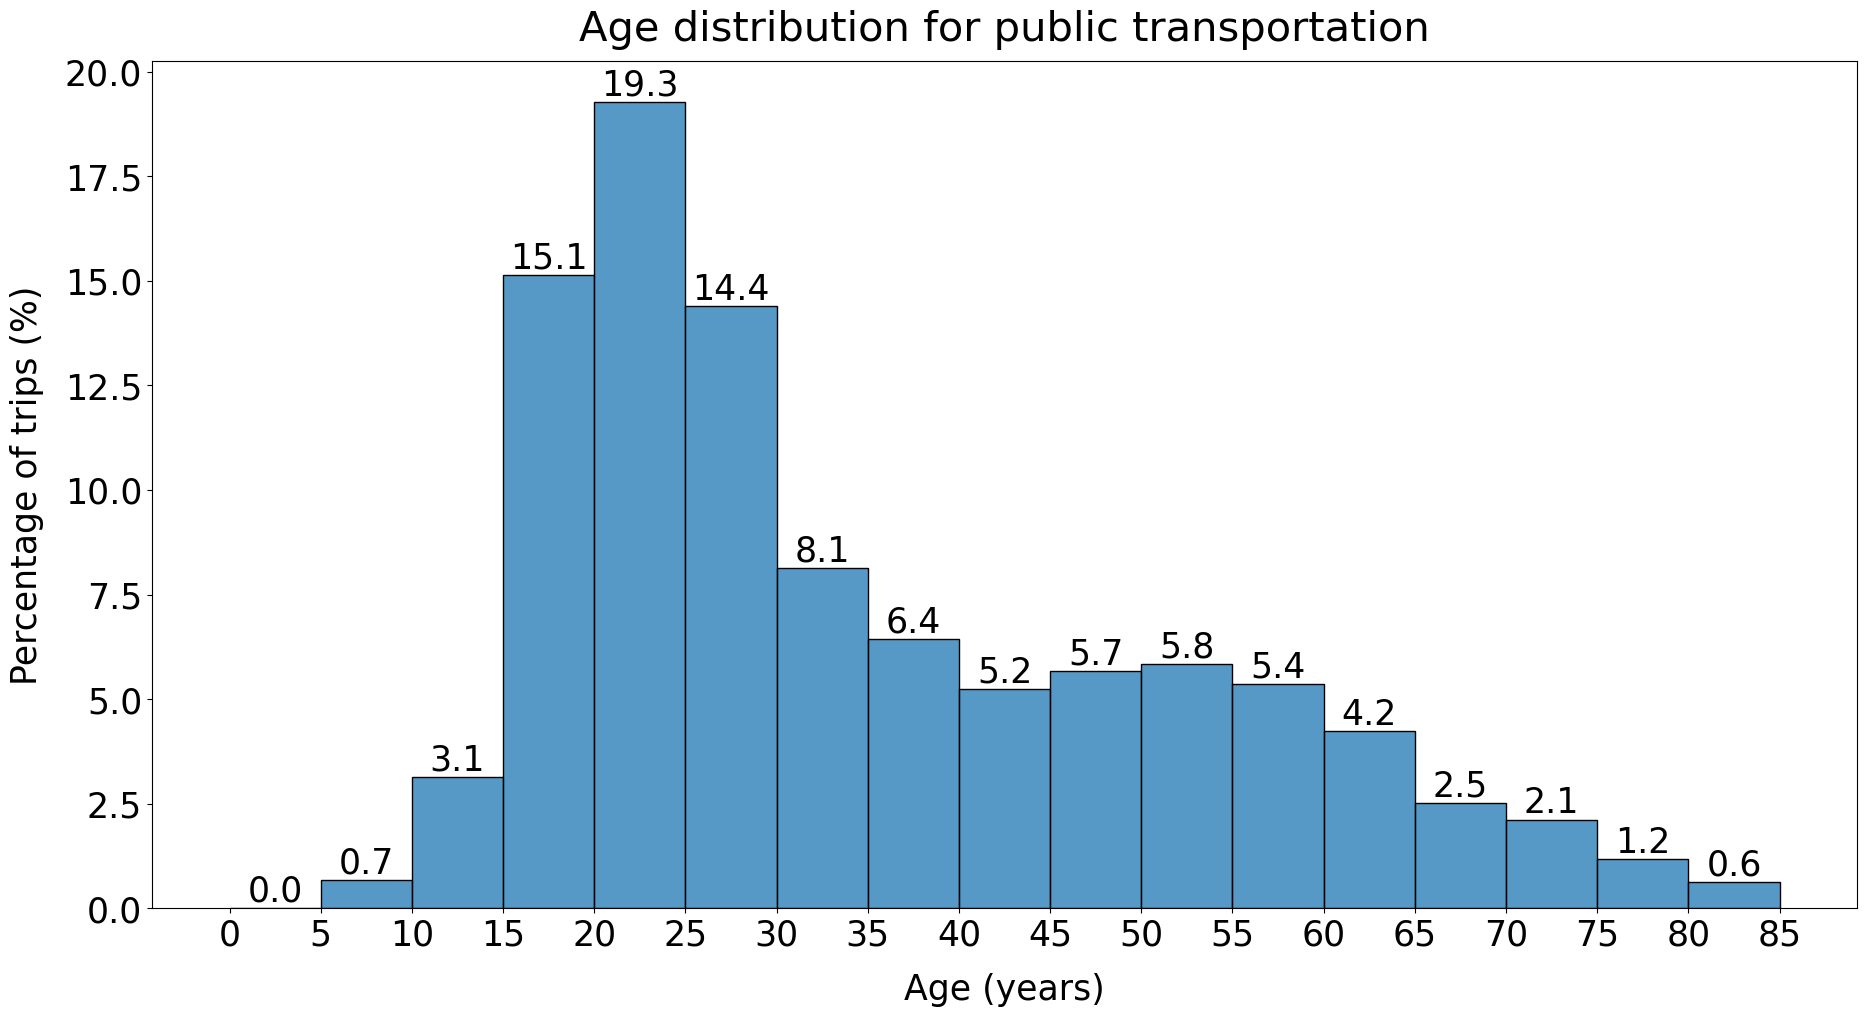

In [22]:
list_bins = list(range(0,90,5))
tsa.plot_histogram_age(public_trips, age_column, expansion_factor = expansion_factor_person, 
                       list_bins = list_bins, mode = 'public transportation')

/home/oem/Documents/ic/bikesp-analysis/data_analysis/TravelSurvey/modules/TravelSurveyAnalysis.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


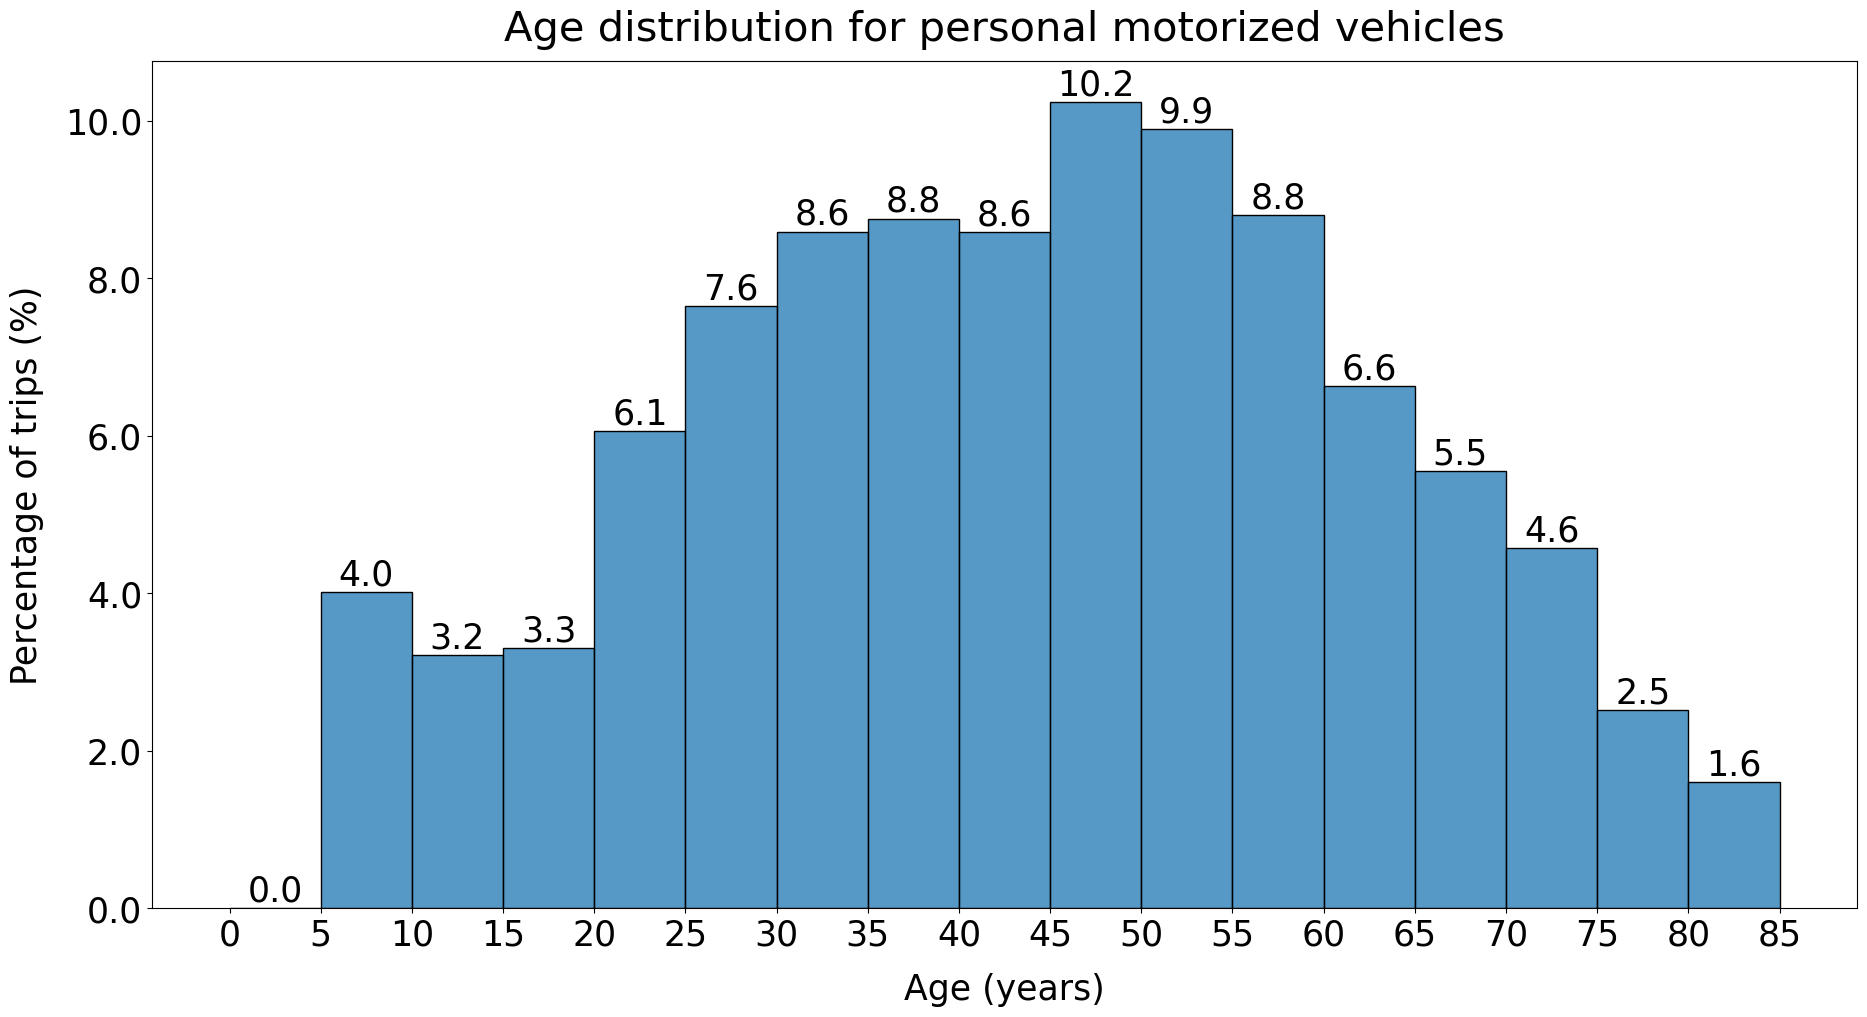

In [23]:
list_bins = list(range(0,90,5))
tsa.plot_histogram_age(individual_trips, age_column, expansion_factor = expansion_factor_person, 
                       list_bins = list_bins, mode = 'personal motorized vehicles')

/home/oem/Documents/ic/bikesp-analysis/data_analysis/TravelSurvey/modules/TravelSurveyAnalysis.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


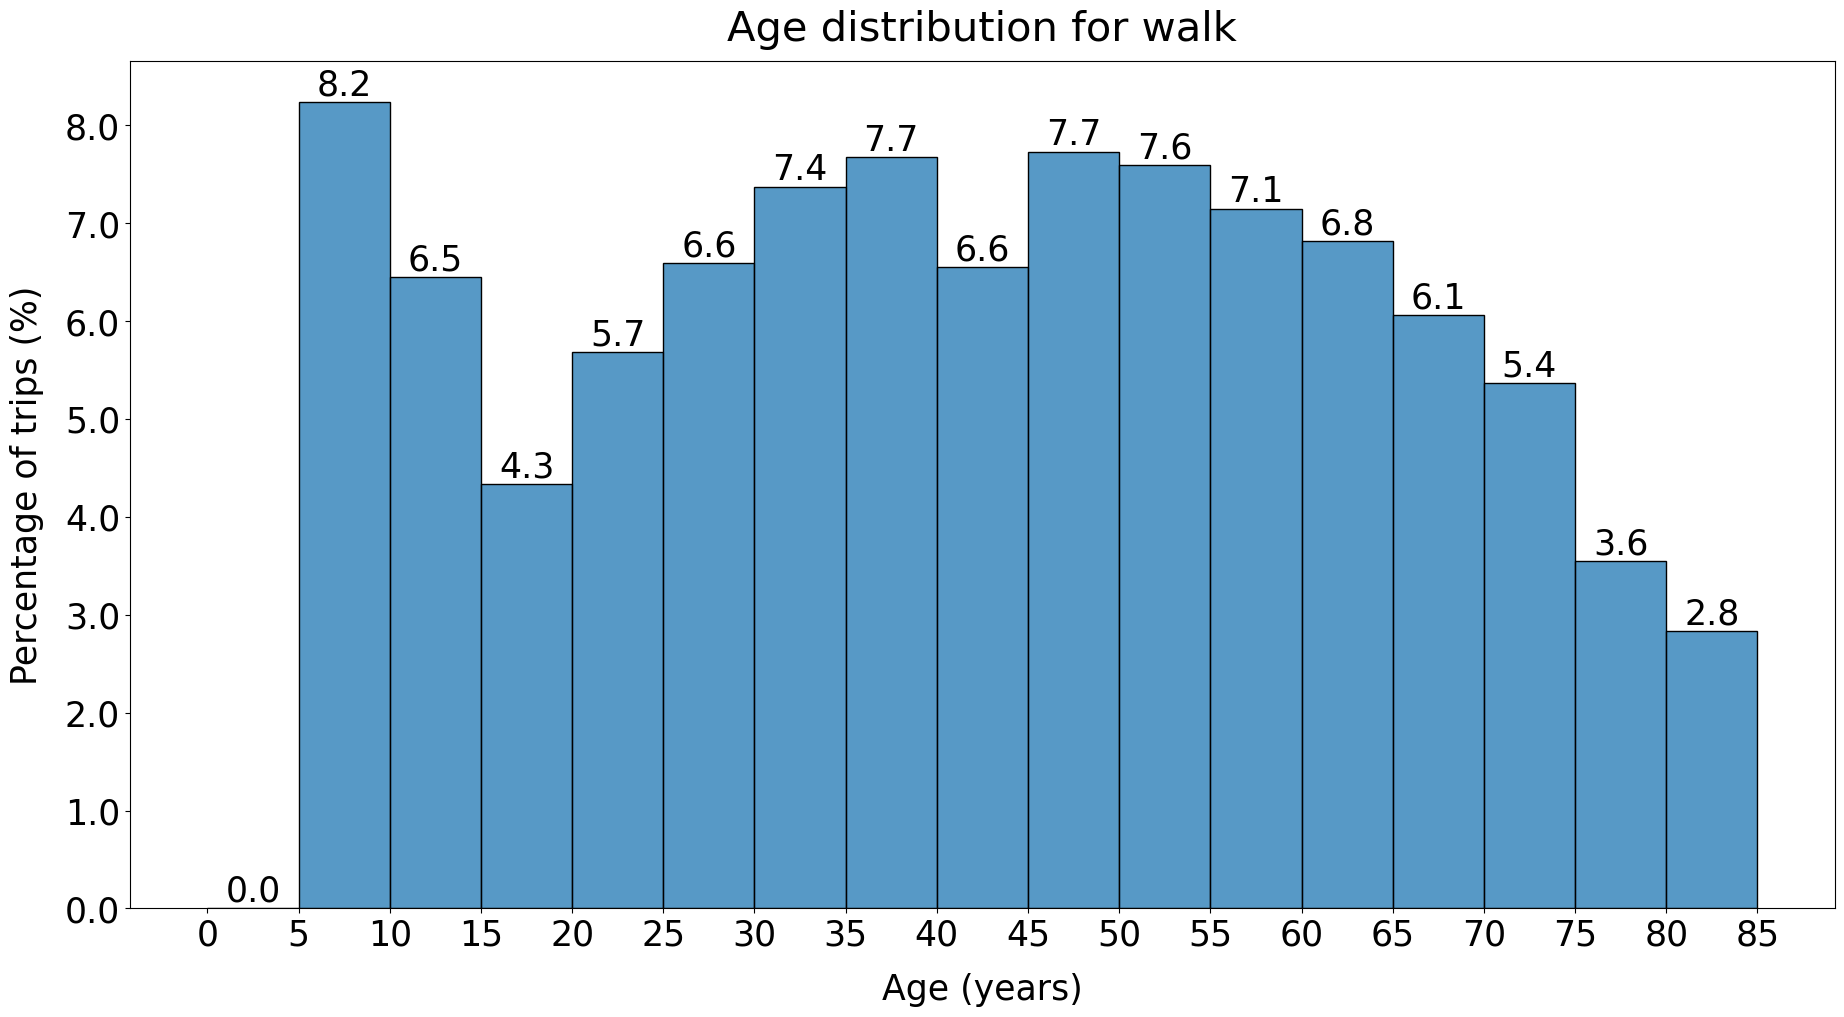

In [24]:
list_bins = list(range(0,90,5))
tsa.plot_histogram_age(walk_trips, age_column, expansion_factor = expansion_factor_person, 
                       list_bins = list_bins, mode = 'walk')

## Social class

columns:
- HHBestInkG - Renda disponível das famílias (grupos de 10%)

- HHGestInkG - Renda disponível familiar padronizada (grupos de 10%)

In [25]:
data['HHBestInkG'].unique()

array([ 8,  3, 10,  5,  6,  1,  2,  7,  9, 11,  4])

In [28]:
social_class_column = 'HHGestInkG'
classes_index_map = {1: 'A', 2: 'B1', 3: 'B1', 4: 'B2', 5: 'B2', 6: 'B2', 7: 'C1', 8: 'C1', 9: 'C2', 10: 'C2', 11:'D-E'}
tsa.calculate_distribution(data, social_class_column, expansion_factor_person, classes_index_map)

,FactorP
HHGestInkG_new,
A,7.010994
B1,13.943503
B2,29.253589
C1,23.317524
C2,24.791189
D-E,1.683201


In [29]:
social_class_column = 'HHBestInkG'
classes_index_map = {1: 'A', 2: 'B1', 3: 'B1', 4: 'B2', 5: 'B2', 6: 'B2', 7: 'C1', 8: 'C1', 9: 'C2', 10: 'C2', 11:'D-E'}
tsa.calculate_distribution(data, social_class_column, expansion_factor_person, classes_index_map)

,FactorP
HHBestInkG_new,
A,5.297966
B1,10.030814
B2,25.578615
C1,25.487291
C2,31.922114
D-E,1.683201


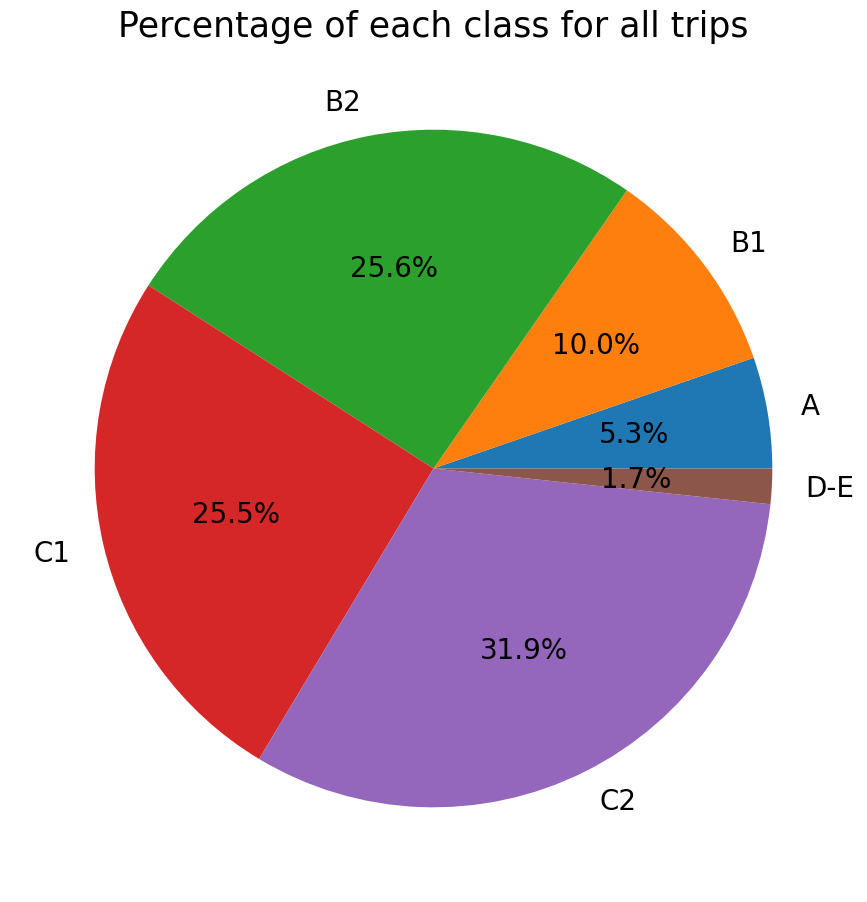

In [32]:
social_class_column = 'HHBestInkG'
tsa.plot_percentage_class(data, social_class_column, classes_index_map)

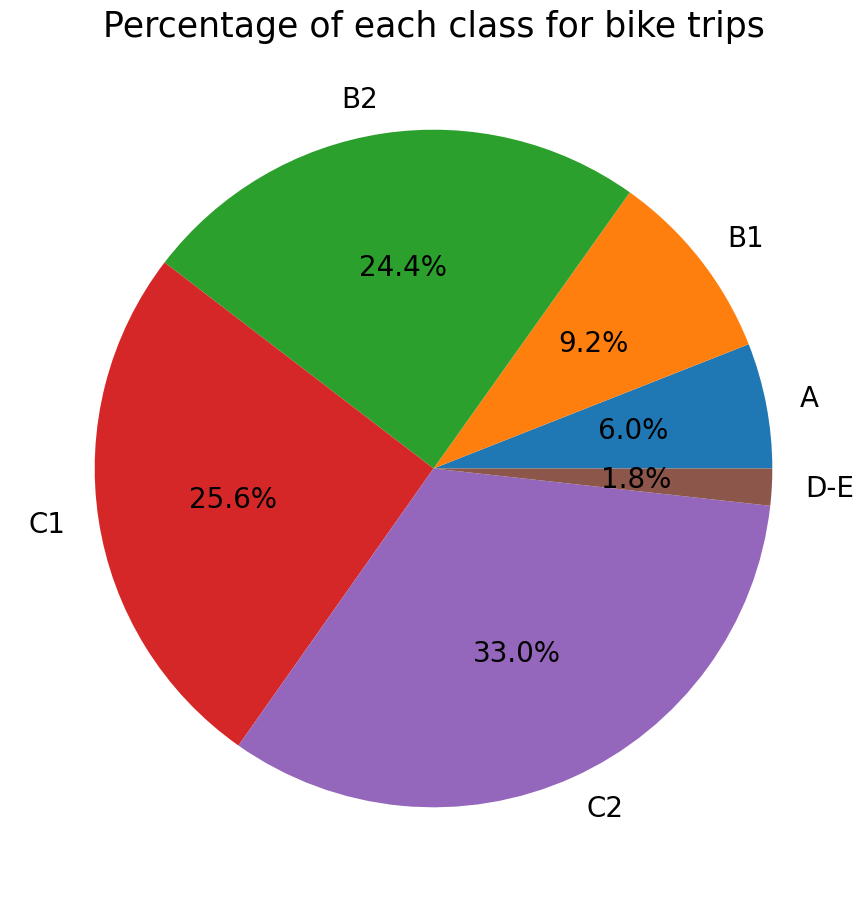

In [33]:
tsa.plot_percentage_class(bike_trips, social_class_column, index_map, bike = True)

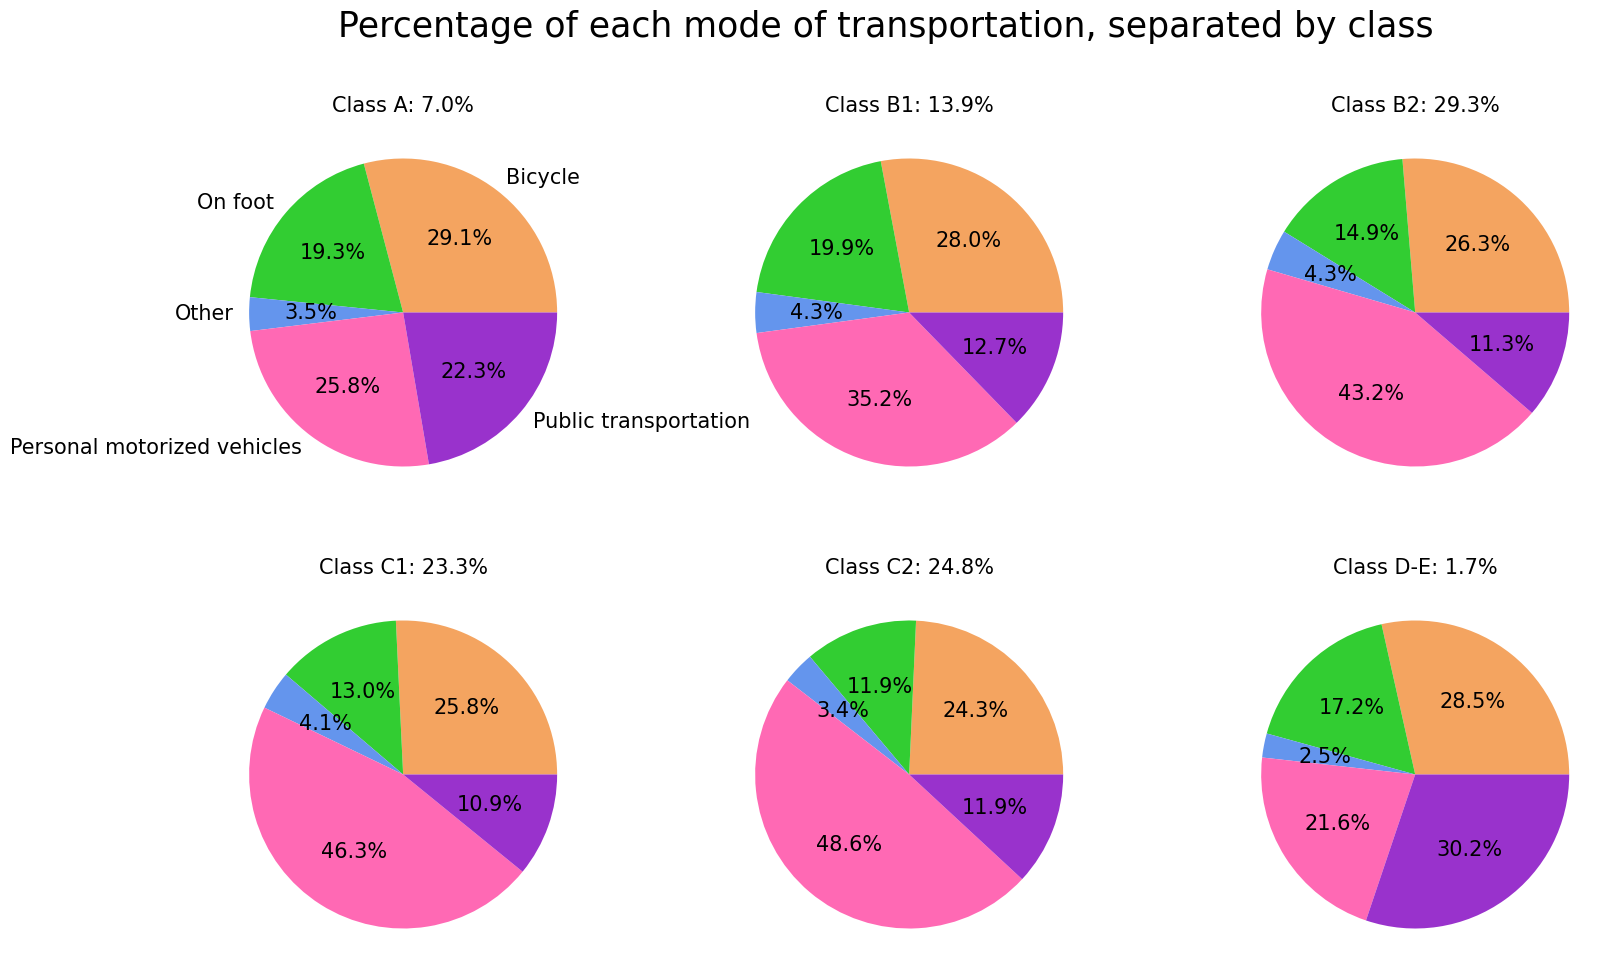

In [39]:
social_class_column = 'HHGestInkG'
tsa.plot_mode_separated_by_class(data, social_class_column, mode_column, mode_index_map, classes_index_map)

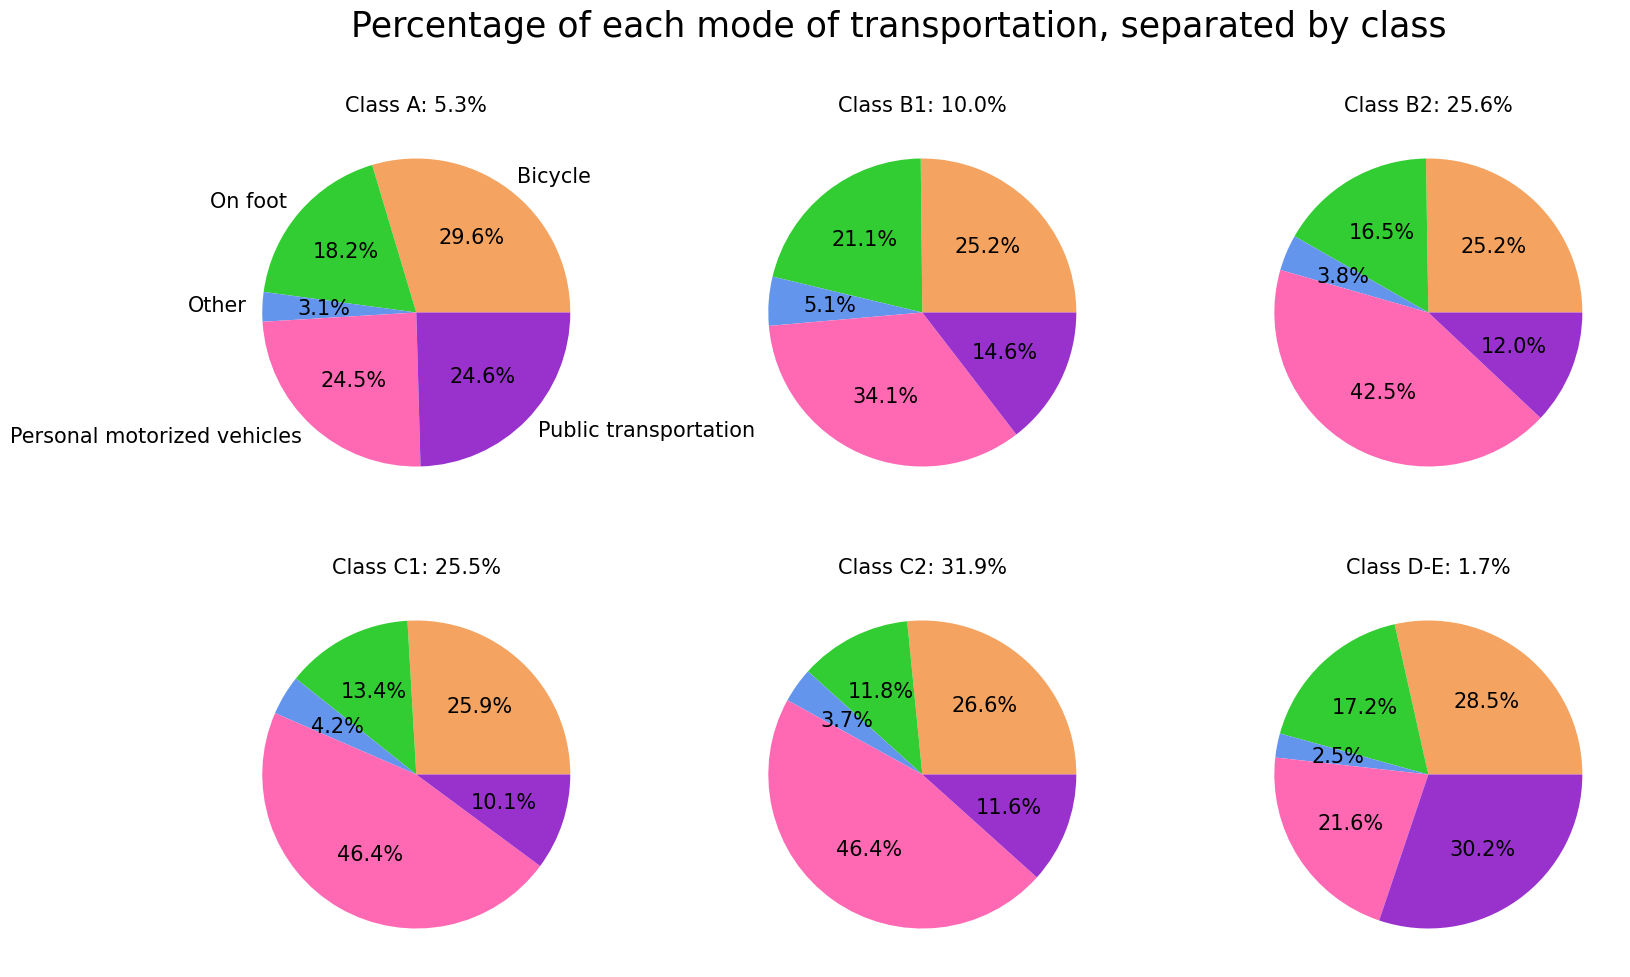

In [40]:
social_class_column = 'HHBestInkG'
tsa.plot_mode_separated_by_class(data, social_class_column, mode_column, mode_index_map, classes_index_map)

## Duration

RReisduur - Duração da viagem na Holanda (em minutos)

RReisduurBL - Tempo de viagem ao exterior (em minutos)

In [41]:
duration_column = 'RReisduur'
new_duration_column = 'Trip duration'

data = tsa.treat_duration_column(data, duration_column, new_duration_column)
data

,OP,OPID,Steekproef,Mode,HHPers,HHSam,HHPlOP,HHLft1,HHLft2,HHLft3,HHLft4,WoPC,WoGem,Sted,GemGr,Prov,Corop,BuurtAdam,MRA,Geslacht,Leeftijd,KLeeft,Herkomst,BetWerk,OnbBez,MaatsPart,Opleiding,HHBestInkG,HHGestInkG,HHLaagInk,HHSocInk,HHWelvG,HHRijbewijsAu,HHRijbewijsMo,HHRijbewijsBr,OPRijbewijsAu,OPRijbewijsMo,OPRijbewijsBr,HHAuto,HHAutoL,OPAuto,BrandstofPa1,XBrandstofPa1,BrandstofEPa1,BouwjaarPa1,KBouwjaarPa1,KGewichtPa1,TenaamPa1,BrandstofPa2,XBrandstofPa2,BrandstofEPa2,BouwjaarPa2,KBouwjaarPa2,KGewichtPa2,TenaamPa2,BrandstofPaL,XBrandstofPaL,BrandstofEPaL,BouwjaarPaL,KBouwjaarPaL,KGewichtPaL,HHMotor,OPMotor,HHBrom,OPBrom,HHSnor,OPSnor,HHEFiets,HHBezitVm,OPBezitVm,FqNEFiets,FqEFiets,FqBTM,FqTrein,FqAutoB,FqAutoP,FqBrSnor,OVStKaart,Jaar,Maand,Week,Dag,Weekdag,Feestdag,Weggeweest,RedenNW,RedenNWZ,RedenNWW,RedenNWB,AantVpl,AantOVVpl,AantSVpl,EFiets,AutoEig,AutoHhL,AutoLWg,AutoLPl,AutoBed,AutoDOrg,AutoDPart,AutoDBek,AutoLeen,AutoHuur,AutoAnd,ByzDag,ByzAdr,ByzVvm,ByzTyd,ByzDuur,ByzRoute,ByzReden,ReisduurOP,AfstandOP,AfstandSOP,Verpl,VerplID,VerplNr,Toer,AantRit,Doel,MotiefV,KMotiefV,MeerWink,AardWerk,VertLoc,VertGeb,VertPC,VertPCBL,VertGem,VertProv,VertCorop,VertMRA,AankGeb,AankPC,AankPCBL,AankGem,AankProv,AankCorop,AankMRA,PCG,GemG,PCBLG,AfstV,KAfstV,Hvm,HvmRol,KHvm,VertUur,VertMin,KVertTijd,AankUur,AankMin,Reisduur,KReisduur,ActDuur,Kind6,VolgWerk,SAantAdr,SDezPlts,SPlaats1,SPlaats2,SPlaats3,SPlaats4,SPlaats5,AfstS,AfstSBL,SVvm1,SVvm2,SVvm3,SVvm4,SBegUur,SBegMin,SEindUur,SEindMin,CorrVerpl,GehBLVer,Rit,RitID,RitNr,AfstR,AfstRBL,KAfstR,Rvm,RvmRol,RAantIn,KRvm,RVertUur,RVertMin,RAankUur,RAankMin,RReisduur,RReisduurBL,RVertStat,RAankStat,RTSamen,RCorrSnelh,RVliegVer,FactorH,FactorP,FactorV,KHvm_new,Geslacht_new,HHBestInkG_new,HHGestInkG_new,Trip duration
0,1,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009301,1,0,1,8,7,4,1,12,1,0,9901.0,1.0,3,1,2,18,0,9933.0,1.0,10,1,2,18,0.0,0,0.0,60,6,1,1,1,10,30,5,10,45,15,4,30,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930101,1,60,0,6,1,1,1,1,10,30,10,45,15,0,0.0,0.0,13,0,0,347,347,126759,Personal motorized vehicles,Man,C1,C1,15
1,0,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009302,2,0,1,1,7,4,3,12,4,0,9933.0,1.0,10,1,2,18,0,9901.0,1.0,3,1,2,18,0.0,0,0.0,60,6,1,1,1,11,15,5,11,25,10,3,270,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930201,1,60,0,6,1,1,1,1,11,15,11,25,10,0,0.0,0.0,13,0,0,347,347,126759,Personal motorized vehicles,Man,C1,C1,10
2,0,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009303,3,0,1,9,8,6,3,12,1,0,9901.0,1.0,3,1,2,18,0,9902.0,1.0,3,1,2,18,0.0,0,0.0,10,3,8,4,5,15,55,8,16,0,5,2,150,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930301,1,10,0,3,8,4,11,5,15,55,16,0,5,0,0.0,0.0,13,0,0,347,347,126759,Bicycle,Man,C1,C1,5
3,0,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009304,4,0,1,1,8,6,3,12,4,0,9902.0,1.0,3,1,2,18,0,9901.0,1.0,3,1,2,18,0.0,0,0.0,10,3,8,4,5,18,30,11,18,35,5,2,#

In [42]:
bike_trips = tsa.get_specific_mode_trips(data, mode_column, ['5'])
bike_trips

,OP,OPID,Steekproef,Mode,HHPers,HHSam,HHPlOP,HHLft1,HHLft2,HHLft3,HHLft4,WoPC,WoGem,Sted,GemGr,Prov,Corop,BuurtAdam,MRA,Geslacht,Leeftijd,KLeeft,Herkomst,BetWerk,OnbBez,MaatsPart,Opleiding,HHBestInkG,HHGestInkG,HHLaagInk,HHSocInk,HHWelvG,HHRijbewijsAu,HHRijbewijsMo,HHRijbewijsBr,OPRijbewijsAu,OPRijbewijsMo,OPRijbewijsBr,HHAuto,HHAutoL,OPAuto,BrandstofPa1,XBrandstofPa1,BrandstofEPa1,BouwjaarPa1,KBouwjaarPa1,KGewichtPa1,TenaamPa1,BrandstofPa2,XBrandstofPa2,BrandstofEPa2,BouwjaarPa2,KBouwjaarPa2,KGewichtPa2,TenaamPa2,BrandstofPaL,XBrandstofPaL,BrandstofEPaL,BouwjaarPaL,KBouwjaarPaL,KGewichtPaL,HHMotor,OPMotor,HHBrom,OPBrom,HHSnor,OPSnor,HHEFiets,HHBezitVm,OPBezitVm,FqNEFiets,FqEFiets,FqBTM,FqTrein,FqAutoB,FqAutoP,FqBrSnor,OVStKaart,Jaar,Maand,Week,Dag,Weekdag,Feestdag,Weggeweest,RedenNW,RedenNWZ,RedenNWW,RedenNWB,AantVpl,AantOVVpl,AantSVpl,EFiets,AutoEig,AutoHhL,AutoLWg,AutoLPl,AutoBed,AutoDOrg,AutoDPart,AutoDBek,AutoLeen,AutoHuur,AutoAnd,ByzDag,ByzAdr,ByzVvm,ByzTyd,ByzDuur,ByzRoute,ByzReden,ReisduurOP,AfstandOP,AfstandSOP,Verpl,VerplID,VerplNr,Toer,AantRit,Doel,MotiefV,KMotiefV,MeerWink,AardWerk,VertLoc,VertGeb,VertPC,VertPCBL,VertGem,VertProv,VertCorop,VertMRA,AankGeb,AankPC,AankPCBL,AankGem,AankProv,AankCorop,AankMRA,PCG,GemG,PCBLG,AfstV,KAfstV,Hvm,HvmRol,KHvm,VertUur,VertMin,KVertTijd,AankUur,AankMin,Reisduur,KReisduur,ActDuur,Kind6,VolgWerk,SAantAdr,SDezPlts,SPlaats1,SPlaats2,SPlaats3,SPlaats4,SPlaats5,AfstS,AfstSBL,SVvm1,SVvm2,SVvm3,SVvm4,SBegUur,SBegMin,SEindUur,SEindMin,CorrVerpl,GehBLVer,Rit,RitID,RitNr,AfstR,AfstRBL,KAfstR,Rvm,RvmRol,RAantIn,KRvm,RVertUur,RVertMin,RAankUur,RAankMin,RReisduur,RReisduurBL,RVertStat,RAankStat,RTSamen,RCorrSnelh,RVliegVer,FactorH,FactorP,FactorV,KHvm_new,Geslacht_new,HHBestInkG_new,HHGestInkG_new,Trip duration
2,0,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009303,3,0,1,9,8,6,3,12,1,0,9901.0,1.0,3,1,2,18,0,9902.0,1.0,3,1,2,18,0.0,0,0.0,10,3,8,4,5,15,55,8,16,0,5,2,150,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930301,1,10,0,3,8,4,11,5,15,55,16,0,5,0,0.0,0.0,13,0,0,347,347,126759,Bicycle,Man,C1,C1,5
3,0,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009304,4,0,1,1,8,6,3,12,4,0,9902.0,1.0,3,1,2,18,0,9901.0,1.0,3,1,2,18,0.0,0,0.0,10,3,8,4,5,18,30,11,18,35,5,2,#NULL!,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930401,1,10,0,3,8,4,11,5,18,30,18,35,5,0,0.0,0.0,13,0,0,347,347,126759,Bicycle,Man,C1,C1,5
7,1,55834100372,1,1,2,2,3,0,0,0,2,9785,5,4,3,1,3,0,18,1,60,14,1,3,0,2,4,10,10,8,9,10,2,0,2,1,0,1,1,0,0,1,0,0,1999,1,2,2,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,0,1,5,4,3,3,3,5,4,2018,1,4,26,6,0,1,0,0,0,0,4,0,0,5,4,4,4,4,4,4,4,4,4,4,4,2,3,3,3,3,3,11,81,184,0,1,5583410037201,1,0,1,2,1,1,3,12,1,0,9785.0,1.0,5,1,3,18,0,9743.0,1.0,14,1,3,18,0.0,0,0.0,80,7,8,4,5,7,45,3,8,10,25,6,230,0,2,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341003720101,1,80,0,7,8,4,11,5,7,45,8,10,25,0,0.0,0.0,13,0,0,115,229,83598,Bicycle,Man,C2,C2,25
10,0,55834100372,1,1,2,2,3,0,0,0,2,9785,5,4,3,1,3,0,18,1,60,14,1,3,0,2,4,10,10,8,9,10,2,0,2,1,0,1,1,0,0,1,0,0,1999,1,2,2,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,0,1,5,4,3,3,3,5,4,2018,1,4,26,6,0,1,0,0,0,0,4,0,0,5,4,4,4,4,4,4,4,4,4,4,4,2,3,3,3,3,3,11,81,184,0,1,5583410037204,4,0,1,1,3,2,3,12,3,0,9743.0,1.0,14,1,3,18,0,9785.0,1.0,5,1,3,18,0.0,0,0.0,100,8,8,4,5,18,0,11,18,45,45,8,#NULL!,0,9,#NULL!,#NULL!,NaN,NaN,N

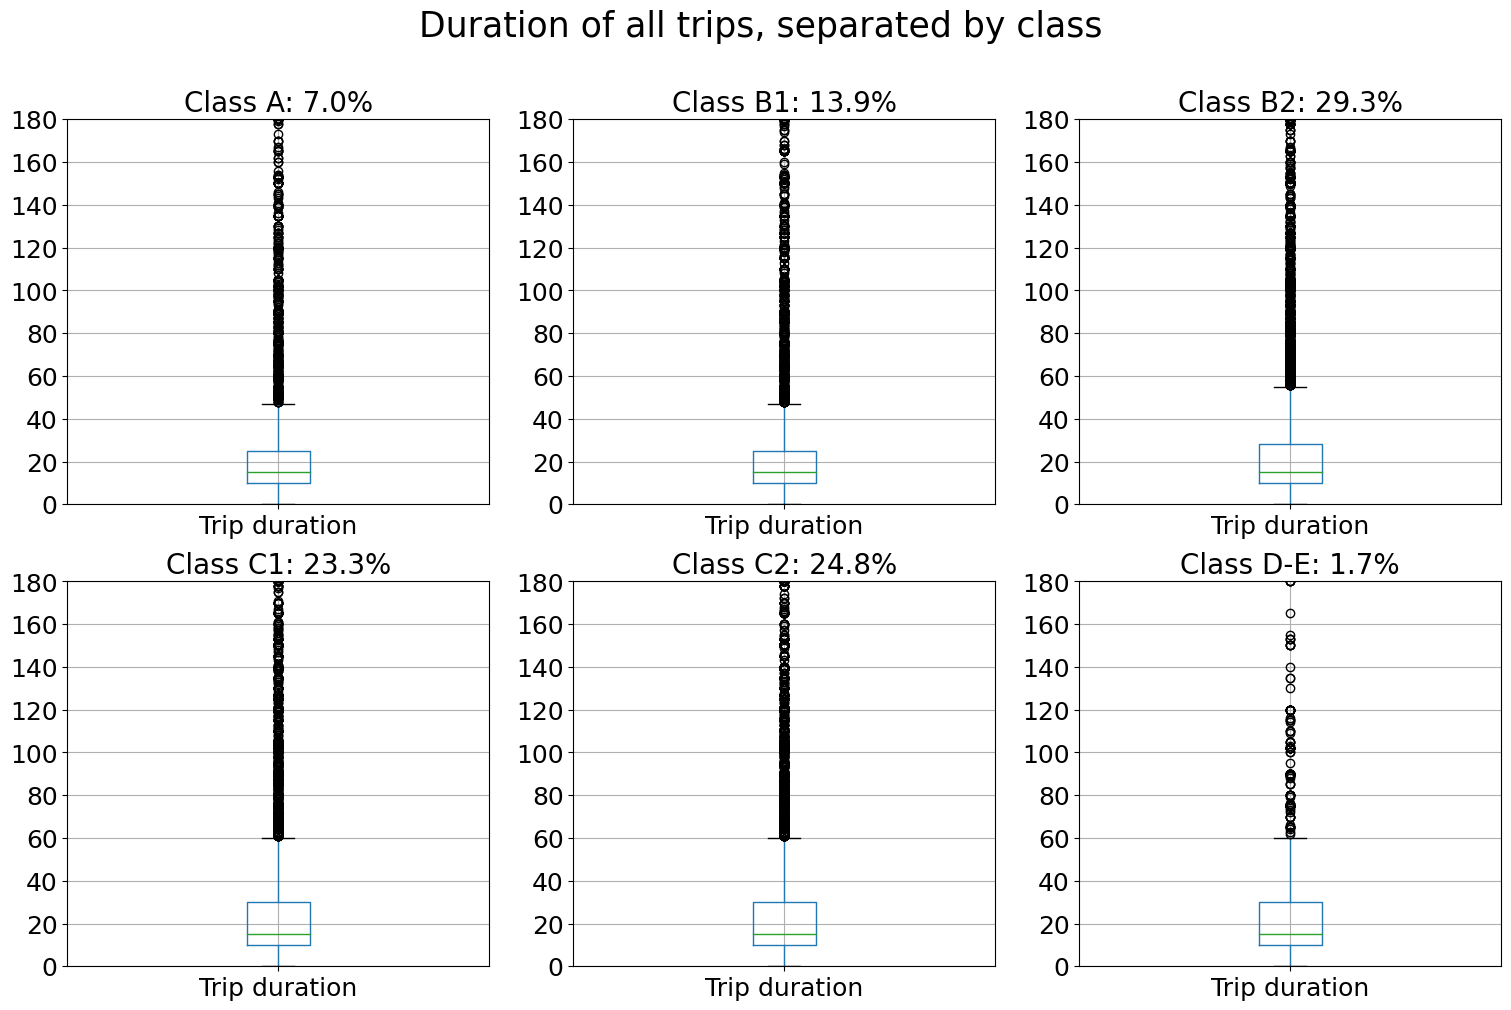

In [43]:
social_class_column = 'HHGestInkG'
tsa.plot_duration_separated_by_class(data, new_duration_column, social_class_column, classes_index_map, bike=False)

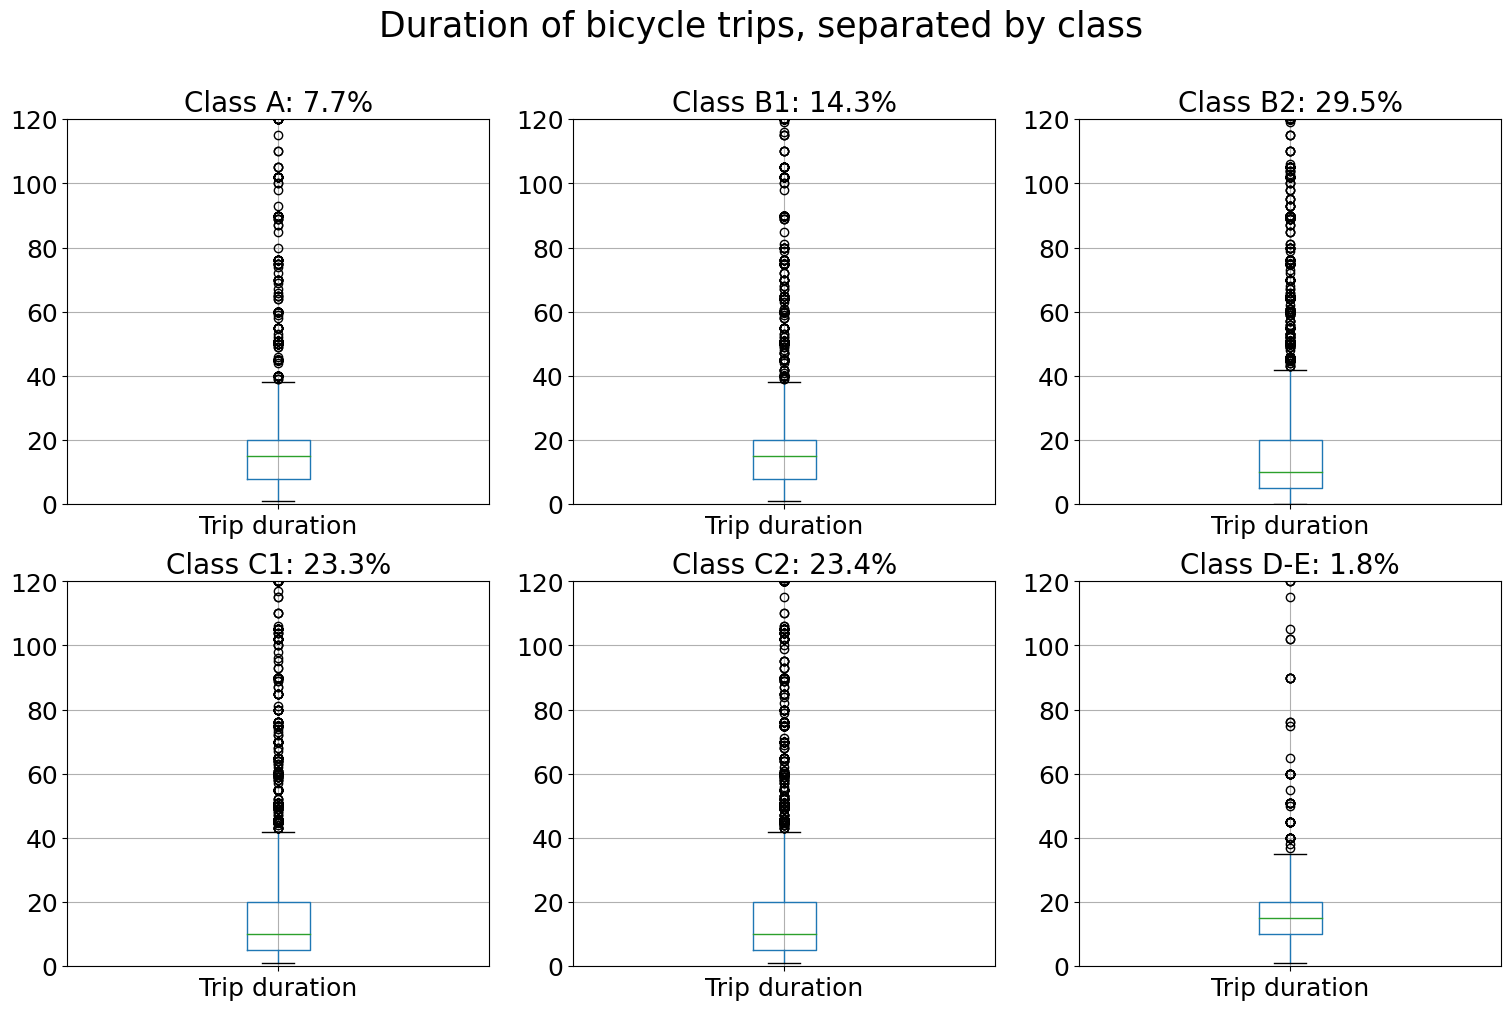

In [44]:
tsa.plot_duration_separated_by_class(bike_trips, new_duration_column, social_class_column, classes_index_map, bike=True)

In [46]:
data[new_duration_column].mean()

23.702153269343057

In [45]:
bike_trips[new_duration_column].mean()

20.071421569588487